In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dp=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/Dewpoints/DewPoint.csv")

In [5]:
dp

,Year,Month,d_past,d_pattopast,DewPoint
0,2002,1,5.70,2.72,5.94
1,2002,2,-0.05,6.87,6.79
2,2002,3,7.51,2.50,5.89
3,2002,4,11.92,10.22,9.09
4,2002,5,15.63,16.92,17.60
...,...,...,...,...,...
211,2019,8,20.42,20.52,20.52
212,2019,9,19.54,21.40,21.40
213,2019,10,15.71,19.17,19.17
214,2019,11,11.47,14.28,14.28


In [6]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
Year           216 non-null int64
Month          216 non-null int64
d_past         216 non-null float64
d_pattopast    216 non-null float64
DewPoint       216 non-null float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [7]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=dp.corr()
corr_matrix

,Year,Month,d_past,d_pattopast,DewPoint
Year,1.000000,0.000000,0.014297,0.047057,0.001049
Month,0.000000,1.000000,0.499590,0.490260,0.505354
d_past,0.014297,0.499590,1.000000,0.934213,0.939820
d_pattopast,0.047057,0.490260,0.934213,1.000000,0.935355
DewPoint,0.001049,0.505354,0.939820,0.935355,1.000000


In [8]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

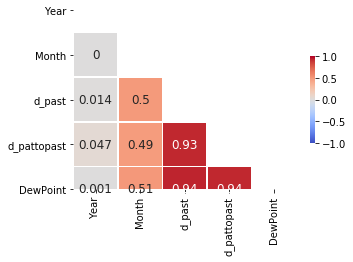

In [9]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [10]:
#mintemp=mintemp.drop(['Month'],axis=1)

In [11]:
dp.shape

(216, 5)

In [12]:
dp=dp.iloc[:,:].values

In [13]:
dp

array([[ 2.002e+03,  1.000e+00,  5.700e+00,  2.720e+00,  5.940e+00],
       [ 2.002e+03,  2.000e+00, -5.000e-02,  6.870e+00,  6.790e+00],
       [ 2.002e+03,  3.000e+00,  7.510e+00,  2.500e+00,  5.890e+00],
       ...,
       [ 2.019e+03,  1.000e+01,  1.571e+01,  1.917e+01,  1.917e+01],
       [ 2.019e+03,  1.100e+01,  1.147e+01,  1.428e+01,  1.428e+01],
       [ 2.019e+03,  1.200e+01,  6.990e+00,  1.106e+01,  1.106e+01]])

In [14]:
X=dp[:,:-1]
y=dp[:,-1]

In [15]:
X

array([[ 2.002e+03,  1.000e+00,  5.700e+00,  2.720e+00],
       [ 2.002e+03,  2.000e+00, -5.000e-02,  6.870e+00],
       [ 2.002e+03,  3.000e+00,  7.510e+00,  2.500e+00],
       [ 2.002e+03,  4.000e+00,  1.192e+01,  1.022e+01],
       [ 2.002e+03,  5.000e+00,  1.563e+01,  1.692e+01],
       [ 2.002e+03,  6.000e+00,  1.985e+01,  2.077e+01],
       [ 2.002e+03,  7.000e+00,  2.001e+01,  2.014e+01],
       [ 2.002e+03,  8.000e+00,  2.032e+01,  2.034e+01],
       [ 2.002e+03,  9.000e+00,  2.014e+01,  2.015e+01],
       [ 2.002e+03,  1.000e+01,  1.850e+01,  1.710e+01],
       [ 2.002e+03,  1.100e+01,  1.409e+01,  1.179e+01],
       [ 2.002e+03,  1.200e+01,  8.500e+00,  7.000e-02],
       [ 2.003e+03,  1.000e+00,  5.940e+00,  5.700e+00],
       [ 2.003e+03,  2.000e+00,  6.790e+00, -5.000e-02],
       [ 2.003e+03,  3.000e+00,  5.890e+00,  7.510e+00],
       [ 2.003e+03,  4.000e+00,  9.090e+00,  1.192e+01],
       [ 2.003e+03,  5.000e+00,  1.760e+01,  1.563e+01],
       [ 2.003e+03,  6.000e+00,

In [16]:
y

array([ 5.94,  6.79,  5.89,  9.09, 17.6 , 20.64, 20.31, 20.25, 19.55,
       16.71,  9.97,  5.41,  6.77,  6.7 ,  5.9 , 11.23, 13.05, 19.42,
       21.  , 20.51, 19.96, 17.39, 11.49,  6.14,  6.29,  3.38,  3.6 ,
       10.52, 18.45, 20.86, 20.67, 20.52, 20.62, 17.48, 13.63,  6.37,
        5.47,  5.35,  6.26, 11.87, 14.97, 20.51, 21.52, 21.19, 21.35,
       18.58, 12.7 ,  9.91,  6.2 ,  2.53,  8.58, 10.07, 15.38, 20.95,
       20.88, 20.71, 21.28, 19.11, 16.85, 11.37,  8.14,  7.56,  6.15,
        9.89, 15.61, 20.87, 21.41, 21.01, 21.13, 16.91, 12.86, 10.78,
        4.07,  4.12,  8.98, 10.48, 14.82, 20.38, 20.28, 20.73, 20.5 ,
       17.44, 14.73, 11.06,  7.19,  3.91,  6.09,  8.79, 14.77, 20.01,
       20.94, 20.78, 20.93, 18.12, 16.3 , 13.13, 10.81,  8.71,  7.79,
       10.1 , 15.68, 21.02, 21.15, 21.3 , 21.07, 19.53, 19.34, 11.96,
        7.44,  7.06,  4.64, 11.75, 15.35, 20.64, 20.66, 20.83, 20.26,
       19.18, 13.57,  7.62,  5.44,  2.63,  0.08, 10.73, 14.28, 18.93,
       20.64, 20.51,

In [17]:
X.shape

(216, 4)

In [18]:
y.shape

(216,)

In [19]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [20]:
X_train,y_train=np.array(X_train),np.array(y_train)

# Linear Regressor

In [21]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [22]:
li=LinearRegression()

In [23]:
li.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
Lir_ypred= li.predict(X_test)
Lir_ypred

array([ 9.55760238, 20.95665519, 18.83496434,  5.73654921,  6.44678162,
       17.33068719,  7.51363884, 20.76105188, 20.28325984, 19.7451887 ,
       18.60436506, 20.37444401, 17.55883528,  7.80346693, 19.57174338,
        4.853842  ,  7.80213165, 14.7745763 , 20.65802567, 15.07637053,
       13.01308275, 20.45241867])

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
#print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 4.596541060078428
Root Mean Squared Error: 2.1439545377825593


In [27]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.8718989523441569

# Lasso Regressor

In [28]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
Lass_ypred= lass.predict(X_test)

In [30]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
#print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 4.596474044173604
Root Mean Squared Error: 2.143938908685041


In [31]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.8719008200110624

# Ridge Regressor

In [32]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
rid_ypred= rid.predict(X_test)

In [34]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
#print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 4.596541067998994
Root Mean Squared Error: 2.1439545396297457


In [35]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.8718989521234186

### Decision Tree Regressor

In [36]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [37]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [38]:
dt_ypred= dt.predict(X_test)

In [39]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
#print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 4.57594090909091
Root Mean Squared Error: 2.139144901377864


In [40]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.872473058153042

# KNN Regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=7)
kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [42]:
kn1_pred=kn.predict(X_test)

In [43]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
#print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 3.419546011131726
Root Mean Squared Error: 1.8492014522846683


In [44]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.9047006388482345

### SVR rbf Regressor

In [45]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
#print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 16.2179442155783
Root Mean Squared Error: 4.02715088065723


In [47]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

0.5480219544032199

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [50]:
rf_pred=rf.predict(X_test)

In [51]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
#print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 3.951476401190922
Root Mean Squared Error: 1.987832085763514


In [52]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.8898762656171594

### Bayesian Regressor

In [53]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)
y_pred=br.predict(X_test)

In [54]:
print('Mean squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
#print('R2_Score:',r2_score(y_test,y_pred))

Mean squared Error: 4.5987749909478906
Root Mean Squared Error: 2.144475458229329


In [55]:
bayes_r2_score=r2_score(y_test,y_pred)
bayes_r2_score

0.8718366949029575

In [56]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

No handles with labels found to put in legend.


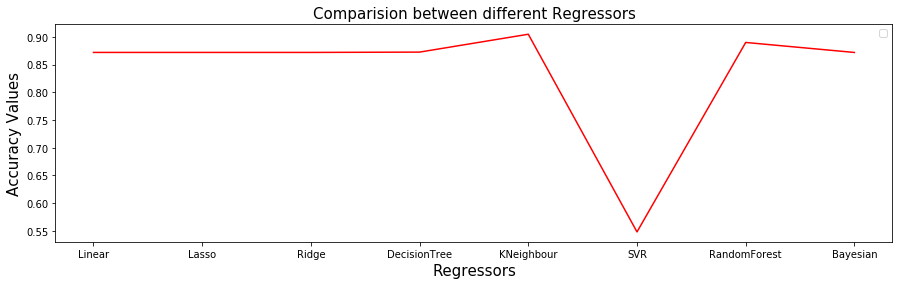

In [57]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


# KNeighbour  is best for dewpoint prediction with accuracy of 90% followed by Random forest with 88% 

In [58]:
dewpoint2020=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/Dewpoints/Dewpoint2020pred.csv")

In [59]:
#sh2020.drop(['MinTemperature','Month'],axis=1,inplace=True)

In [60]:
dewpoint2020=dewpoint2020.iloc[:,:].values

In [61]:
dewpoint2020

array([[2.020e+03, 1.000e+00, 4.880e+00, 6.700e+00],
       [2.020e+03, 2.000e+00, 2.700e+00, 4.880e+00],
       [2.020e+03, 3.000e+00, 5.430e+00, 7.190e+00],
       [2.020e+03, 4.000e+00, 6.820e+00, 9.580e+00],
       [2.020e+03, 5.000e+00, 1.520e+01, 1.518e+01],
       [2.020e+03, 6.000e+00, 2.086e+01, 2.126e+01],
       [2.020e+03, 7.000e+00, 2.093e+01, 2.085e+01],
       [2.020e+03, 8.000e+00, 2.052e+01, 2.042e+01],
       [2.020e+03, 9.000e+00, 2.140e+01, 1.954e+01],
       [2.020e+03, 1.000e+01, 1.917e+01, 1.571e+01],
       [2.020e+03, 1.100e+01, 1.428e+01, 1.147e+01],
       [2.020e+03, 1.200e+01, 1.106e+01, 6.990e+00]])

In [62]:
dewpoint2020_pred=[]

In [63]:
dewpoint2020_pred=kn.predict(dewpoint2020)

In [64]:
dewpoint2020_pred

array([ 5.23714286,  5.23714286,  6.31428571,  6.39714286, 14.85857143,
       20.81428571, 20.89142857, 20.64571429, 20.59714286, 19.13857143,
       12.24      ,  9.33428571])

In [65]:
dewpoint_data=pd.DataFrame(data=dewpoint2020_pred)
dewpoint_data

,0
0,5.237143
1,5.237143
2,6.314286
3,6.397143
4,14.858571
5,20.814286
6,20.891429
7,20.645714
8,20.597143
9,19.138571


In [66]:
dewpoint_data.to_csv(r"C:\Users\Abhishek Wagh\Desktop\MTech_Project\Sugarcane\Phase1\csv\Dewpoints\2020dewpoint.csv")